## Imports

In [55]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

from time import sleep

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Library

In [16]:
def get_broadcast_links(month):
    sleep(4)
    res = requests.get(site_index + month)
    soup = BeautifulSoup(res.content, 'lxml')
    
    list_of_program_links = []

    for day in soup.find_all('ul', {'class':'elist'}):
        print('currently collecting links for:', " ".join(day.text.split('\n')[1].split()[-3:]))
        for ntwrk in day.find_all('li', {'class':'elist_network'}):
            try:
                first_segment = ntwrk.find('li', {'class':'elist_segment'})
#                 print(first_segment.find('a')['href'])
                list_of_program_links.append(first_segment.find('a')['href'].replace('broadcasts', 'programs'))
            except:
                pass
#         print()
#     print()
#     print('DONE COLLECTING ALL LINKS FOR', month)
    print(len(list_of_program_links), 'program links for', month)
    return list_of_program_links

In [17]:
def get_segments(broadcast_programs_url):
    url = main_url + broadcast_programs_url
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'lxml')
    programs = []
    headline = soup.find('h4', {'class':'program-headline'}).text
    date = headline.split()[-1]
    overall_duration = " ".join(soup.find('p', {'class':'program-duration'}).text.split()[3:])
    for row in soup.find_all('li', {'class':'listing program-clip'}):
        program = {
            'headline':headline,
            'network':headline.split()[0],
            'date':date,
            'overall_duration':overall_duration
        }
        program['title'] = row.find('h4', {'class':'title'}).text
        program['program_id'] = row.find('p', {'class':'id'}).text.replace("#", "")
        
        timestamps = row.find('p', {'class':'timestamp'}).text
        program['timestamps'] = timestamps
        start = datetime.strptime(timestamps.split('—')[0], '%I:%M:%S %p ')
        end = datetime.strptime(timestamps.split('—')[1], ' %I:%M:%S %p')
        program['start_time'] = start.time()
        program['end_time'] = end.time()
        program['duration'] = (end - start).seconds
        
        description = ""
        try:
            description = row.find('div', {'class':'description'}).text
        except:
            pass
        program['description'] = description
        reporters = []
        if len(description) > 0:
            try:
                for x in description.split(")"):
                    if "(" in x:
                        reporters.append(x.split(":")[1].strip())
            except:
                pass
        program['reporters'] = reporters
        programs.append(program)
    return programs

## Running

In [18]:
month = '2017-06'

site_index = 'https://tvnews.vanderbilt.edu/siteindex/'
main_url = 'https://tvnews.vanderbilt.edu'

In [ ]:
# collected_links = get_broadcast_links(month)

# has output

In [ ]:
# %time
# df = pd.DataFrame()
# for link in collected_links:
#     print('fetching information for', link)
#     df = pd.concat([df, pd.DataFrame(get_segments(link))])
#     sleep(4)

# print()
# print('DONE COLLECTING INFORMATION FOR', month)
# df.head()

# has output

In [20]:
%time # started at 8:33

q1 = ['2018-01', '2018-02', '2018-03']

q1_df = pd.DataFrame()

for month in q1:
    for link in get_broadcast_links(month):
#         print('fetching information for', link)
        q1_df = pd.concat([q1_df, pd.DataFrame(get_segments(link))])
        sleep(4)
    print('done collecting info for', month)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs
currently collecting links for: January 1, 2018
currently collecting links for: January 2, 2018
currently collecting links for: January 3, 2018
currently collecting links for: January 4, 2018
currently collecting links for: January 5, 2018
currently collecting links for: January 6, 2018
currently collecting links for: January 7, 2018
currently collecting links for: January 8, 2018
currently collecting links for: January 9, 2018
currently collecting links for: January 10, 2018
currently collecting links for: January 11, 2018
currently collecting links for: January 12, 2018
currently collecting links for: January 13, 2018
currently collecting links for: January 14, 2018
currently collecting links for: January 15, 2018
currently collecting links for: January 16, 2018
currently collecting links for: January 17, 2018
currently collecting links for: January 18, 2018
currently collecting links for: January 19, 2018
currently coll

In [21]:
datetime.now() # this took....14 minutes-ish

datetime.datetime(2019, 12, 11, 20, 47, 0, 210092)

In [22]:
q1_df.shape

(2492, 12)

In [23]:
q1_df.head(3)

,headline,network,date,overall_duration,title,program_id,timestamps,start_time,end_time,duration,description,reporters
0,ABC Evening News for 2018-01-01,ABC,2018-01-01,29 minutes long,Preview/Introduction\tTom Llamas (New York),1119334,05:30:00 pm — 05:31:20 pm,17:30:00,17:31:20,80,,[]
1,ABC Evening News for 2018-01-01,ABC,2018-01-01,29 minutes long,Winter Weather / Cold,1119335,05:31:20 pm — 05:36:00 pm,17:31:20,17:36:00,280,(Studio: Tom Llamas) Report introduced. \n\n...,"[Tom Llamas, Erielle Reshef, Tom Llamas, Ginge..."
2,ABC Evening News for 2018-01-01,ABC,2018-01-01,29 minutes long,Costa Rica / Plane Crash,1119336,05:36:00 pm — 05:36:50 pm,17:36:00,17:36:50,50,(Studio: Tom Llamas) Report introduced. \n\n...,"[Tom Llamas, Adrienne Bankert]"


In [24]:
q1_df.groupby('network').agg(
    num_days=('date', 'nunique'), num_programs=('program_id', 'nunique'))

,num_days,num_programs
network,,
ABC,89,1275
CBS,8,121
CNN,64,771
NBC,21,325


In [25]:
q1_df.to_csv('./data/2018_q1.csv', index=False)

In [26]:
# started at 8:54

q2 = ['2018-04', '2018-05', '2018-06']

q2_df = pd.DataFrame()

for month in q2:
    for link in get_broadcast_links(month):
#         print('fetching information for', link)
        q2_df = pd.concat([q2_df, pd.DataFrame(get_segments(link))])
        sleep(4)
    print('done collecting info for', month)

currently collecting links for: April 1, 2018
currently collecting links for: April 2, 2018
currently collecting links for: April 3, 2018
currently collecting links for: April 4, 2018
currently collecting links for: April 5, 2018
currently collecting links for: April 6, 2018
currently collecting links for: April 7, 2018
currently collecting links for: April 8, 2018
currently collecting links for: April 9, 2018
currently collecting links for: April 10, 2018
currently collecting links for: April 11, 2018
currently collecting links for: April 12, 2018
currently collecting links for: April 13, 2018
currently collecting links for: April 14, 2018
currently collecting links for: April 15, 2018
currently collecting links for: April 16, 2018
currently collecting links for: April 17, 2018
currently collecting links for: April 18, 2018
currently collecting links for: April 19, 2018
currently collecting links for: April 20, 2018
currently collecting links for: April 21, 2018
currently collecting l

In [27]:
datetime.now() # 14 minutes

datetime.datetime(2019, 12, 11, 21, 8, 53, 984479)

In [28]:
q2_df.shape

(2758, 12)

In [30]:
q2_df.head(3)

,headline,network,date,overall_duration,title,program_id,timestamps,start_time,end_time,duration,description,reporters
0,ABC Evening News for 2018-04-01,ABC,2018-04-01,29 minutes long,Preview/Introduction\tTom Llamas (New York),1122697,05:30:00 pm — 05:31:10 pm,17:30:00,17:31:10,70,,[]
1,ABC Evening News for 2018-04-01,ABC,2018-04-01,29 minutes long,Severe Weather / Snow,1122698,05:31:10 pm — 05:33:30 pm,17:31:10,17:33:30,140,(Studio: Tom Llamas) Report introduced. \n\n...,"[Tom Llamas, Sam Champion]"
2,ABC Evening News for 2018-04-01,ABC,2018-04-01,29 minutes long,Trump / Immigration,1122699,05:33:30 pm — 05:36:10 pm,17:33:30,17:36:10,160,(Studio: Tom Llamas) Report introduced. \n\n...,"[Tom Llamas, Tara Palmeri]"


In [31]:
q2_df.groupby('network').agg(
    num_days=('date', 'nunique'), num_programs=('program_id', 'nunique'))

,num_days,num_programs
network,,
ABC,88,1299
CBS,22,338
CNN,64,789
NBC,21,332


In [37]:
q2_df.to_csv('./data/2018_q2.csv', index=False)

In [32]:
# started at 9:25

q3 = ['2018-07', '2018-08', '2018-09']

q3_df = pd.DataFrame()

for month in q3:
    for link in get_broadcast_links(month):
#         print('fetching information for', link)
        q3_df = pd.concat([q3_df, pd.DataFrame(get_segments(link))])
        sleep(4)
    print('done collecting info for', month)

currently collecting links for: July 1, 2018
currently collecting links for: July 2, 2018
currently collecting links for: July 3, 2018
currently collecting links for: July 4, 2018
currently collecting links for: July 5, 2018
currently collecting links for: July 6, 2018
currently collecting links for: July 7, 2018
currently collecting links for: July 8, 2018
currently collecting links for: July 9, 2018
currently collecting links for: July 10, 2018
currently collecting links for: July 11, 2018
currently collecting links for: July 12, 2018
currently collecting links for: July 13, 2018
currently collecting links for: July 14, 2018
currently collecting links for: July 15, 2018
currently collecting links for: July 16, 2018
currently collecting links for: July 17, 2018
currently collecting links for: July 18, 2018
currently collecting links for: July 19, 2018
currently collecting links for: July 20, 2018
currently collecting links for: July 21, 2018
currently collecting links for: July 22, 20

In [33]:
datetime.now() # 14 minutes

datetime.datetime(2019, 12, 11, 21, 39, 35, 353135)

In [34]:
q3_df.shape

(2590, 12)

In [35]:
q3_df.head(3)

,headline,network,date,overall_duration,title,program_id,timestamps,start_time,end_time,duration,description,reporters
0,ABC Evening News for 2018-07-01,ABC,2018-07-01,21 minutes long,Preview/Introduction\tTom Llamas (New York),1126863,05:08:20 pm — 05:09:30 pm,17:08:20,17:09:30,70,,[]
1,ABC Evening News for 2018-07-01,ABC,2018-07-01,21 minutes long,"Weather: Heat Wave, Flooding",1126864,05:09:30 pm — 05:12:00 pm,17:09:30,17:12:00,150,(Studio: Tom Llamas) Report introduced. \n\n...,"[Tom Llamas, Rob Marciano]"
2,ABC Evening News for 2018-07-01,ABC,2018-07-01,21 minutes long,Bahamas / Tour Boat Explosion,1126865,05:12:00 pm — 05:13:40 pm,17:12:00,17:13:40,100,(Studio: Tom Llamas) Report introduced. \n\n...,"[Tom Llamas, Erielle Reshef]"


In [36]:
q3_df.groupby('network').agg(
    num_days=('date', 'nunique'), num_programs=('program_id', 'nunique'))

,num_days,num_programs
network,,
ABC,85,1205
CBS,14,211
CNN,64,763
NBC,26,411


In [38]:
q3_df.to_csv('./data/2018_q3.csv', index=False)

In [42]:
# started at 9:56

q4 = ['2018-10', '2018-11', '2018-12']

q4_df = pd.DataFrame()

for month in q4:
    for link in get_broadcast_links(month):
#         print('fetching information for', link)
        q4_df = pd.concat([q4_df, pd.DataFrame(get_segments(link))])
        sleep(4)
    print('done collecting info for', month)

currently collecting links for: October 1, 2018
currently collecting links for: October 2, 2018
currently collecting links for: October 3, 2018
currently collecting links for: October 4, 2018
currently collecting links for: October 5, 2018
currently collecting links for: October 6, 2018
currently collecting links for: October 7, 2018
currently collecting links for: October 8, 2018
currently collecting links for: October 9, 2018
currently collecting links for: October 10, 2018
currently collecting links for: October 11, 2018
currently collecting links for: October 12, 2018
currently collecting links for: October 13, 2018
currently collecting links for: October 14, 2018
currently collecting links for: October 15, 2018
currently collecting links for: October 16, 2018
currently collecting links for: October 17, 2018
currently collecting links for: October 18, 2018
currently collecting links for: October 19, 2018
currently collecting links for: October 20, 2018
currently collecting links fo

In [43]:
datetime.now() # 13-14 minutes-ish

datetime.datetime(2019, 12, 11, 22, 9, 31, 397007)

In [44]:
q4_df.shape

(2383, 12)

In [45]:
q4_df.head(3)

,headline,network,date,overall_duration,title,program_id,timestamps,start_time,end_time,duration,description,reporters
0,ABC Evening News for 2018-10-01,ABC,2018-10-01,29 minutes long,Preview/Introduction\tDavid Muir (New York),1130528,05:30:00 pm — 05:31:30 pm,17:30:00,17:31:30,90,,[]
1,ABC Evening News for 2018-10-01,ABC,2018-10-01,29 minutes long,Supreme Court / Kavanaugh Nomination / After S...,1130529,05:31:30 pm — 05:40:20 pm,17:31:30,17:40:20,530,(Studio: David Muir) Report introduced. \n\n...,"[David Muir, Cecilia Vega, David Muir, Pierre ..."
2,ABC Evening News for 2018-10-01,ABC,2018-10-01,29 minutes long,Indonesia / Earthquake,1130530,05:40:20 pm — 05:42:30 pm,17:40:20,17:42:30,130,(Studio: David Muir) Report introduced. \n\n...,"[David Muir, James Longman]"


In [46]:
q4_df.groupby('network').agg(
    num_days=('date', 'nunique'), num_programs=('program_id', 'nunique'))

,num_days,num_programs
network,,
ABC,80,1208
CBS,8,115
CNN,59,681
NBC,24,379


In [47]:
q4_df.to_csv('./data/2018_q4.csv', index=False)

## Joining

In [48]:
df = pd.concat([q1_df, q2_df, q3_df, q4_df])
df.shape

(10223, 12)

In [49]:
df.head(3)

,headline,network,date,overall_duration,title,program_id,timestamps,start_time,end_time,duration,description,reporters
0,ABC Evening News for 2018-01-01,ABC,2018-01-01,29 minutes long,Preview/Introduction\tTom Llamas (New York),1119334,05:30:00 pm — 05:31:20 pm,17:30:00,17:31:20,80,,[]
1,ABC Evening News for 2018-01-01,ABC,2018-01-01,29 minutes long,Winter Weather / Cold,1119335,05:31:20 pm — 05:36:00 pm,17:31:20,17:36:00,280,(Studio: Tom Llamas) Report introduced. \n\n...,"[Tom Llamas, Erielle Reshef, Tom Llamas, Ginge..."
2,ABC Evening News for 2018-01-01,ABC,2018-01-01,29 minutes long,Costa Rica / Plane Crash,1119336,05:36:00 pm — 05:36:50 pm,17:36:00,17:36:50,50,(Studio: Tom Llamas) Report introduced. \n\n...,"[Tom Llamas, Adrienne Bankert]"


In [50]:
df.tail(3)

,headline,network,date,overall_duration,title,program_id,timestamps,start_time,end_time,duration,description,reporters
15,ABC Evening News for 2018-12-31,ABC,2018-12-31,29 minutes long,Upcoming Items & COMMERCIALS: Publishers Clear...,1133502,05:52:00 pm — 05:55:50 pm,17:52:00,17:55:50,230,,[]
16,ABC Evening News for 2018-12-31,ABC,2018-12-31,29 minutes long,ABC News Team,1133503,05:55:50 pm — 05:58:40 pm,17:55:50,17:58:40,170,(Studio: Tom Llamas) The ABC News team acknow...,[Tom Llamas]
17,ABC Evening News for 2018-12-31,ABC,2018-12-31,29 minutes long,Broadcast ends,1133504,05:58:40 pm — 05:58:40 pm,17:58:40,17:58:40,0,,[]


In [51]:
df.to_csv('./data/all_of_2018.csv', index=False)

### trying for duration

In [52]:
def get_duration(subsection):
    return subsection.sum() / 60

In [53]:
time_agg = df.groupby(['network', 'date', 'overall_duration']).agg(get_duration)
time_agg = time_agg.reset_index()
time_agg.head()

,network,date,overall_duration,duration
0,ABC,2018-01-01,29 minutes long,28.666667
1,ABC,2018-01-02,29 minutes long,28.833333
2,ABC,2018-01-03,29 minutes long,28.666667
3,ABC,2018-01-04,29 minutes long,28.666667
4,ABC,2018-01-05,30 minutes long,29.833333


In [59]:
df.groupby(['network', 'date']).size()

network  date      
ABC      2018-01-01    15
         2018-01-02    17
         2018-01-03    15
         2018-01-04    12
         2018-01-05    13
                       ..
NBC      2018-12-15    17
         2018-12-16    18
         2018-12-23    16
         2018-12-29    16
         2018-12-30    18
Length: 737, dtype: int64

In [63]:
time_agg['date'].min()

'2018-01-01'

In [64]:
time_agg['date'].max()

'2018-12-31'

In [65]:
time_agg['date'].nunique()

362

In [66]:
time_agg['date'].value_counts()

2018-05-26    3
2018-12-09    3
2018-01-20    3
2018-04-01    3
2018-06-24    3
             ..
2018-09-22    1
2018-05-28    1
2018-11-10    1
2018-12-01    1
2018-09-15    1
Name: date, Length: 362, dtype: int64

### by quarter??

In [77]:
q1_df.tail(2)

,headline,network,date,overall_duration,title,program_id,timestamps,start_time,end_time,duration,description,reporters
18,NBC Evening News for 2018-03-31,NBC,2018-03-31,29 minutes long,St. Louis. Missouri / Easter Candy Art,1122695,05:56:50 pm — 05:59:00 pm,17:56:50,17:59:00,130,(Studio: Jose Diaz Balart) Report introduced....,"[Jose Diaz Balart, Kristin Dahlgren]"
19,NBC Evening News for 2018-03-31,NBC,2018-03-31,29 minutes long,Good Night,1122696,05:59:00 pm — 05:59:00 pm,17:59:00,17:59:00,0,,[]


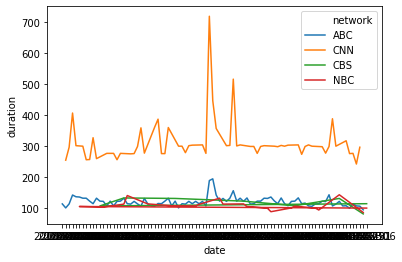

In [70]:
sns.lineplot(data=q1_df, x='date', y='duration', hue='network', err_style=None);

In [81]:
q1_agg = q1_df.groupby(['network', 'date']).agg(get_duration)
q1_agg = q1_agg.reset_index()
q1_agg.head(2)

,network,date,duration
0,ABC,2018-01-01,28.666667
1,ABC,2018-01-02,28.833333


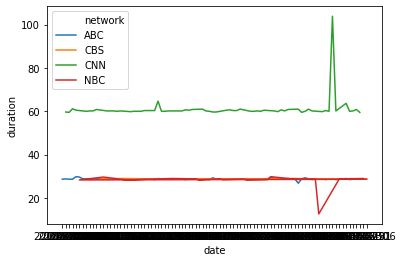

In [82]:
sns.lineplot(data=q1_agg, x='date', y='duration', hue='network', err_style=None);

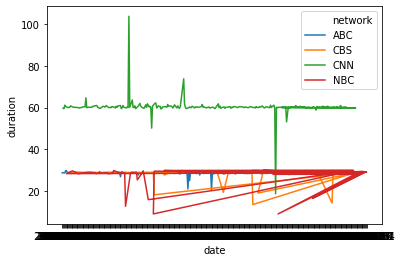

In [61]:
sns.lineplot(data=time_agg, x='date', y='duration', hue='network', err_style=None);

In [72]:
time_agg.shape

(737, 4)

In [74]:
time_agg.groupby('network').size()

network
ABC    342
CBS     52
CNN    251
NBC     92
dtype: int64

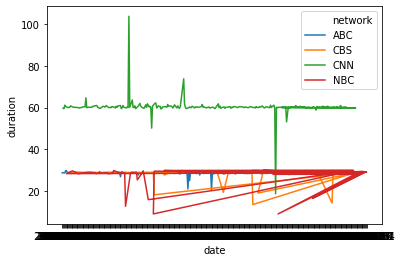

In [61]:
sns.lineplot(data=time_agg, x='date', y='duration', hue='network', err_style=None);

In [75]:
time_agg = time_agg.sort_values('date')

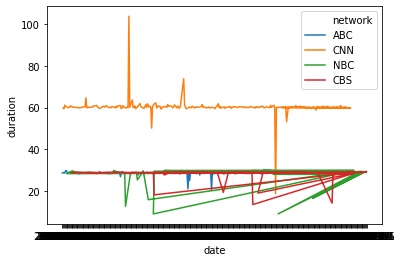

In [76]:
sns.lineplot(data=time_agg, x='date', y='duration', hue='network', err_style=None);

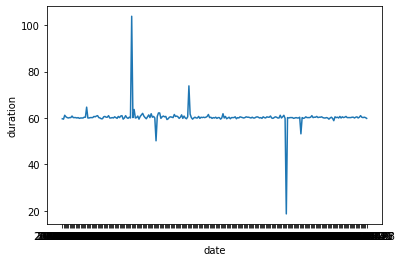

In [69]:
sns.lineplot(data=time_agg.loc[time_agg['network'] == 'CNN'], x='date', y='duration', err_style=None);

In [85]:
time_agg.loc[time_agg['network'] == 'CNN']['duration'].max()

103.83333333333333

In [86]:
time_agg.loc[time_agg['network'] == 'CNN']['duration'].min()

18.666666666666668

In [87]:
time_agg.loc[(time_agg['network'] == 'CNN') & (time_agg['duration'] > 100)]

,network,date,overall_duration,duration
451,CNN,2018-03-22,about 2 hours long,103.833333


In [95]:
q1_df.loc[(q1_df['network'] == 'CNN') & (q1_df['date'] == '2018-03-22')]

,headline,network,date,overall_duration,title,program_id,timestamps,start_time,end_time,duration,description,reporters
0,CNN Evening News for 2018-03-22,CNN,2018-03-22,about 2 hours long,Introduction/Preview\tAnderson Cooper (New York),1122232,07:00:10 pm — 07:01:20 pm,19:00:10,19:01:20,70,Note: This show contains the entire CNN excl...,[]
1,CNN Evening News for 2018-03-22,CNN,2018-03-22,about 2 hours long,Trump / National Security Adviser / A Discussion,1122233,07:01:20 pm — 07:11:30 pm,19:01:20,19:11:30,610,(Studio: Anderson Cooper) President Trump's r...,"[Anderson Cooper, Anderson Cooper; White House..."
2,CNN Evening News for 2018-03-22,CNN,2018-03-22,about 2 hours long,Upcoming Items & COMMERCIALS: T-Mobile; One-A-...,1122234,07:11:30 pm — 07:15:30 pm,19:11:30,19:15:30,240,,[]
3,CNN Evening News for 2018-03-22,CNN,2018-03-22,about 2 hours long,Trump / McDougal Interview (Part I),1122235,07:15:30 pm — 07:32:20 pm,19:15:30,19:32:20,1010,(Studio: Anderson Cooper) The exclusive CNN i...,[Anderson Cooper]
4,CNN Evening News for 2018-03-22,CNN,2018-03-22,about 2 hours long,"Upcoming Items & COMMERCIALS: CNN ""The Kennedy...",1122236,07:32:20 pm — 07:36:10 pm,19:32:20,19:36:10,230,,[]
5,CNN Evening News for 2018-03-22,CNN,2018-03-22,about 2 hours long,Trump / McDougal Interview (Part II),1122237,07:36:10 pm — 07:42:10 pm,19:36:10,19:42:10,360,(Studio: Anderson Cooper) The exclusive CNN i...,[Anderson Cooper]
6,CNN Evening News for 2018-03-22,CNN,2018-03-22,about 2 hours long,"Upcoming Items & COMMERCIALS: CNN ""Pope""; Roun...",1122238,07:42:10 pm — 07:46:30 pm,19:42:10,19:46:30,260,,[]
7,CNN Evening News for 2018-03-22,CNN,2018-03-22,about 2 hours long,Trump / McDougal Interview (Part III),1122239,07:46:30 pm — 07:53:00 pm,19:46:30,19:53:00,390,(Studio: Anderson Cooper) The exclusive CNN i...,[Anderson Cooper]
8,CNN Evening News for 2018-03-22,CNN,2018-03-22,about 2 hours long,Upcoming Items & COMMERCIALS: T-Mobile; Flonas...,1122240,07:53:00 pm — 07:57:20 pm,19:53:00,19:57:20,260,,[]
9,CNN Evening News for 2018-03-22,CNN,2018-03-22,about 2 hours long,Trump / McDougal Interview (Part IV),1122241,07:57:20 pm — 08:15:00 pm,19:57:20,20:15:00,1060,(Studio: Anderson Cooper) The exclusive CNN i...,[Anderson Cooper]


In [101]:
df.loc[df['title'].str.contains('COMMERCIALS')].shape

(2523, 12)

In [103]:
df.loc[df['title'].str.contains('COMMERCIALS')].head(2)

,headline,network,date,overall_duration,title,program_id,timestamps,start_time,end_time,duration,description,reporters
8,ABC Evening News for 2018-01-01,ABC,2018-01-01,29 minutes long,Upcoming Items & COMMERCIALS: Walgreens; Pom W...,1119342,05:45:10 pm — 05:47:40 pm,17:45:10,17:47:40,150,,[]
10,ABC Evening News for 2018-01-01,ABC,2018-01-01,29 minutes long,Upcoming Items & COMMERCIALS: Lyrica; Allstate...,1119344,05:49:00 pm — 05:52:30 pm,17:49:00,17:52:30,210,,[]


In [104]:
df.shape

(10223, 12)

In [105]:
df['reporters'].value_counts()

[]                                                          4016
[David Muir]                                                 701
[Anderson Cooper]                                            413
[Tom Llamas]                                                 268
[Anderson Cooper, Anderson Cooper]                           144
                                                            ... 
[David Muir, White House]                                      1
[Anderson Cooper, Anderson Cooper; Calexico, California]       1
[Savannah Guthrie, Bill Neely]                                 1
[Anderson Cooper, a total witch hunt.]  \n\n(Studio]           1
[Elaine Quijano, Ben Tracy, Elaine Quijano, Meg Oliver]        1
Name: reporters, Length: 1438, dtype: int64

In [107]:
report_test = df[['reporters']]
report_test.head(3)

,reporters
0,[]
1,"[Tom Llamas, Erielle Reshef, Tom Llamas, Ginge..."
2,"[Tom Llamas, Adrienne Bankert]"


In [116]:
report_test.loc[report_test['reporters'].map(lambda d: len(d)) > 0]

(6207, 1)

In [117]:
report_test = report_test.loc[report_test['reporters'].map(lambda d: len(d)) > 0]
report_test.head(3)

,reporters
1,"[Tom Llamas, Erielle Reshef, Tom Llamas, Ginge..."
2,"[Tom Llamas, Adrienne Bankert]"
3,"[Tom Llamas, Clayton Sandell]"


In [118]:
report_test.tail()

,reporters
9,[Tom Llamas]
10,[Tom Llamas]
12,"[Tom Llamas, Clayton Sandell]"
14,[Tom Llamas]
16,[Tom Llamas]


In [124]:
report_test.shape

(6207, 1)

In [125]:
report_test.explode('reporters').shape

(6156342, 1)

In [129]:
exploded_reporters = report_test.explode('reporters')
exploded_reporters.shape

(6156342, 1)

In [130]:
exploded_reporters['reporters'].value_counts()

David Muir                                                                                                                                                                                                                                                                                                                                                                                                            1120502
Anderson Cooper                                                                                                                                                                                                                                                                                                                                                                                                        923041
Tom Llamas                                                                                                                                                                  

In [132]:
exploded_reporters.loc[exploded_reporters['reporters'].str.contains('\n')].shape

(126016, 1)

In [133]:
exploded_reporters.loc[~(exploded_reporters['reporters'].str.contains('\n'))].shape

(6030326, 1)

In [134]:
real_explode = exploded_reporters.loc[~(exploded_reporters['reporters'].str.contains('\n'))]

In [136]:
real_explode.loc[real_explode['reporters'].str.contains('"')].shape

(2779, 1)

In [137]:
real_explode.loc[~(real_explode['reporters'].str.contains('"'))].shape

(6027547, 1)

In [138]:
real_explode = real_explode.loc[~(real_explode['reporters'].str.contains('"'))]

In [139]:
real_explode.shape

(6027547, 1)

In [142]:
real_explode.head(10)

,reporters
0,Kate Snow
0,Lucy Kafanov
0,Elaine Quijano
0,Carter Evans
0,John Berman
0,Kate Snow
0,Anne Thompson
0,Victor Oquendo
0,"Tom Llamas; Ft. Lee, New Jersey"
0,Anderson Cooper


In [144]:
real_explode['reporters'].value_counts()

David Muir          1120502
Anderson Cooper      923041
Tom Llamas           539222
Kate Snow            232484
Jose Diaz Balart     158422
                     ...   
Dave Gura               179
Jim Axelrod             134
Chris Connelly          133
Blayne Alexander         67
Kirsten Dalgren          24
Name: reporters, Length: 602, dtype: int64

In [145]:
real_explode.loc[real_explode['reporters'].str.contains(';')].shape

(371824, 1)

In [146]:
real_explode.loc[real_explode['reporters'].str.contains(';')].head()

,reporters
0,"Tom Llamas; Ft. Lee, New Jersey"
0,Anderson Cooper; White House
0,"Tom Llamas; Ft. Lee, New Jersey"
0,Anderson Cooper; White House
0,"Tom Llamas; Ft. Lee, New Jersey"


In [147]:
real_explode.loc[real_explode['reporters'].str.contains(';')]['reporters'].value_counts()

Anderson Cooper; White House         68401
Anderson Cooper; Washington          59848
David Muir; New York                 30373
Anderson Cooper; Capitol Hill        15343
Anderson Cooper; New York            10650
                                     ...  
Anderson Cooper; Southport             349
Anderson Cooper; Toronto               285
Anderson Cooper; Benton, Kentucky      285
Anderson Cooper;Boston                 252
Anderson Cooper; San Juan              252
Name: reporters, Length: 153, dtype: int64

In [148]:
def fix_reporter(cell):
    return cell.split(';')[0]

In [149]:
real_explode.loc[real_explode['reporters'].str.contains(';')]['reporters'].apply(fix_reporter).value_counts()

Anderson Cooper                                                                                                                                                                                  230165
David Muir                                                                                                                                                                                        66039
John Berman                                                                                                                                                                                       26415
Tom Llamas                                                                                                                                                                                        18041
Jim Sciutto                                                                                                                                                                                       13149


In [150]:
real_explode.loc[real_explode['reporters'].map(lambda d: len(d.split())) == 2].shape

(5331820, 1)

In [152]:
real_explode.loc[real_explode['reporters'].map(lambda d: len(d.split())) == 2].tail(3)

,reporters
18,Kristin Dahlgren
19,Errol Barnett
19,Chip Reid


In [151]:
real_explode.loc[real_explode['reporters'].map(lambda d: len(d.split())) > 2].shape

(686536, 1)

In [156]:
real_explode.loc[real_explode['reporters'].map(lambda d: len(d.split())) > 4].tail(10)

,reporters
11,"John Berman; Chiang Rai, Thailand"
11,"John Berman; Chiang Rai, Thailand"
11,"John Berman; Chiang Rai, Thailand"
11,"John Berman; Chiang Rai, Thailand"
11,"John Berman; Chiang Rai, Thailand"
11,"John Berman; Chiang Rai, Thailand"
11,"John Berman; Chiang Rai, Thailand"
11,"John Berman; Chiang Rai, Thailand"
11,"John Berman; Chiang Rai, Thailand"
11,"John Berman; Chiang Rai, Thailand"


In [157]:
real_explode.loc[real_explode['reporters'].str.contains(';')].tail(10)

,reporters
12,Anderson Cooper; San Juan
12,Anderson Cooper;Boston
12,David Muir; New York
12,Anderson Cooper; San Juan
12,Anderson Cooper;Boston
12,David Muir; New York
12,Anderson Cooper; San Juan
12,Anderson Cooper;Boston
12,David Muir; New York
12,Anderson Cooper; San Juan
